# SVM with Iris

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [4]:
# Let's check the scores that the SVM used to make these predictions
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

In [23]:
# Let's make decisions on make_moons() with PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [6]:
# Let0s use kernel and degree hyperparameters in SVC

from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [26]:
X_test, y_test = make_moons(n_samples=25, noise=0.3, random_state=42)


In [8]:
polynomial_svm_clf.predict(X_test), poly_kernel_svm_clf.predict(X_test)

(array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0]),
 array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 0]))

In [9]:
# Now try SVC with the Gaussian RBF kernel

rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=0.001))

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

In [14]:
# Let's try SVM linear regression
from sklearn.svm import LinearSVR
import numpy as np

X = np.linspace(0, 1000, 50).reshape(-1, 1)
y = np.linspace(0, 900, 50).reshape(-1, 1)

svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=0.5, random_state=42)) # the more epsilon the wider is the margin

svm_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [67]:
from sklearn.svm import SVR
from sklearn.datasets import make_circles

X, y = make_circles(shuffle=True)
X_test, y_test = make_circles(n_samples=25)

pol_pipeline = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, epsilon=0.1, C=0.01))

pol_pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

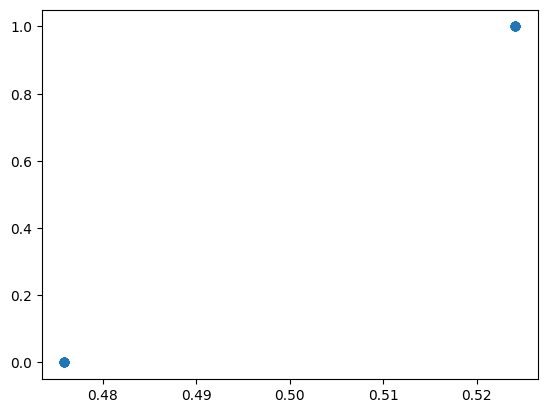

In [66]:
plt.scatter(pol_pipeline.predict(X_test), y_test)

# 8.

In [90]:
from sklearn.datasets import load_iris

dataset = load_iris(as_frame=True)

X = dataset.data["sepal length (cm)"].values.reshape(-1, 1)
y = np.array(dataset.target == 1).reshape(-1, 1)
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [114]:
from sklearn.linear_model import SGDClassifier

sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))

sgd_clf.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [132]:
svc_clf = make_pipeline(StandardScaler(), SVC(random_state=42))

svc_clf.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [121]:
svc_lin = make_pipeline(StandardScaler(), LinearSVC(random_state=42))

svc_lin.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [131]:
X_test = np.linspace(0, 15, 35).reshape(-1, 1)
sgd_clf.predict(X_test), svc_clf.predict(X_test), svc_lin.predict(X_test)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True]))

# 9.

In [159]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

data = load_wine(as_frame=True)

X = data.data["alcohol"].values.reshape(-1, 1)
y = data.target.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [202]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

svc_clf = Pipeline([("SCL", StandardScaler()), ("SVC", SVC(random_state=42, C=3, gamma=44))])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"SVC__kernel": ["linear", "rbf", "sigmoid", "precomputed"],"SVC__C": [0.01, 0.1, 1, 10, 100], "SVC__gamma": [0.1, 1, 10, 100, 1000], "SVC__tol": [0.001, 0.01, 0.1, 1, 2]}

rndm_s = RandomizedSearchCV(svc_clf, param_distributions, n_iter=5, cv=3, scoring="accuracy")

rndm_s.fit(X_train, y_train.ravel())

In [ ]:
from sklearn.model_selection import GridSearchCV

grd_s = GridSearchCV(svc_clf, param_distributions, cv=3, scoring="accuracy")
grd_s.fit(X_train, y_train.ravel())

accuracy_score(y_test, grd_s.best_estimator_.predict(X_test))

In [250]:
final_m = rndm_s.best_estimator_
accuracy_score(y_test, final_m.predict(X_test))

0.6888888888888889

In [257]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

<Axes: xlabel='Longitude', ylabel='Latitude'>

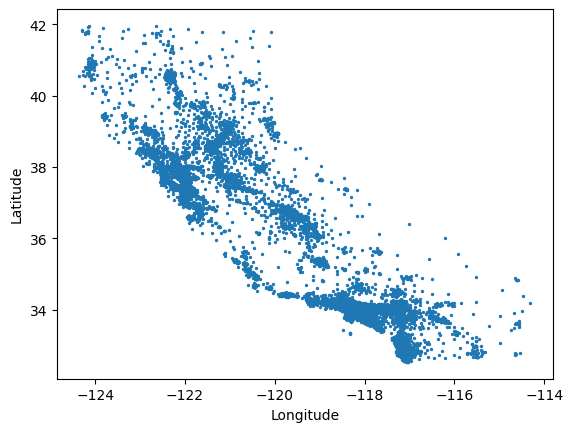

In [264]:
housing.data.plot(kind="scatter", x="Longitude", y="Latitude", s=2)

In [274]:
X = housing.data.values
X.shape

(20640, 8)

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [270]:
y = housing.target.values.reshape(-1, 1)

In [282]:
from sklearn.svm import SVR

svr = SVR()

svr_pipeline = Pipeline([("SCL", StandardScaler()), ("SVR", SVR())])

param_dis = {"SVR__epsilon" : [0.1, 0.3, 0.5, 0.9, 1.5, 2], "SVR__C": [1, 2, 4, 5, 50, 100]}

rndm_s = RandomizedSearchCV(svr_pipeline, param_dis, n_iter=5, cv=3)

In [284]:
rndm_s.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('SCL', StandardScaler()),
                                             ('SVR', SVR())]),
                   n_iter=5,
                   param_distributions={'SVR__C': [1, 2, 4, 5, 50, 100],
                                        'SVR__epsilon': [0.1, 0.3, 0.5, 0.9,
                                                         1.5, 2]})

In [289]:
final_model = rndm_s.best_estimator_

y_preds = final_model.predict(X_test)

In [298]:
from sklearn.model_selection import cross_val_score

-cross_val_score(final_model, X_test, y_test.ravel(), scoring="neg_root_mean_squared_error", cv=3)

array([0.58556406, 0.5830684 , 0.56984473])